In [2]:
import sys
sys.path.append('C:\\Users\\xpy\\work\\strategies2py\\AprilQuant')
from collections import defaultdict, OrderedDict

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import empyrical

from backtest.return_rate_calculations import (
    cal_avg_cum_ret, 
    avg_cum_ret_from_cursor, 
    ret_from_cum_ret, 
    cum_ret_from_doc
)
from utils import query, plot_curves
from consts import C_DAILY


sns.set_style('darkgrid')

DB = 'CHANNEL'

# 策略整体表现
使用复权价格/真实价格产生交易信号

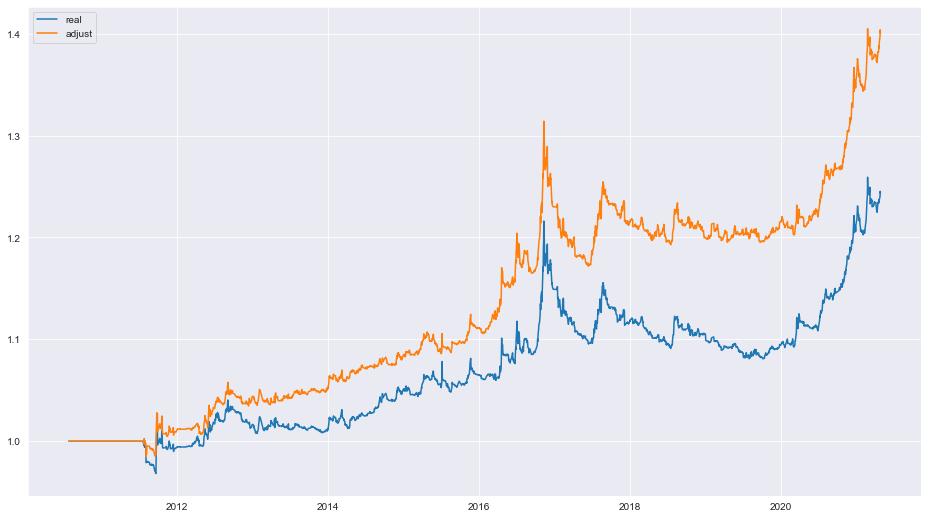

In [3]:
cursor_real = query(db_name=DB, col='daily', use_real_price=True)
cum_ret_real = avg_cum_ret_from_cursor(cursor_real) 

cursor_adjust = query(db_name=DB, col='daily', use_real_price=False)
cum_ret_adjust = avg_cum_ret_from_cursor(cursor_adjust)

plot_curves([cum_ret_real, cum_ret_adjust], '', ['real', 'adjust'])

# 策略在各品种上的表现

d:\python\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


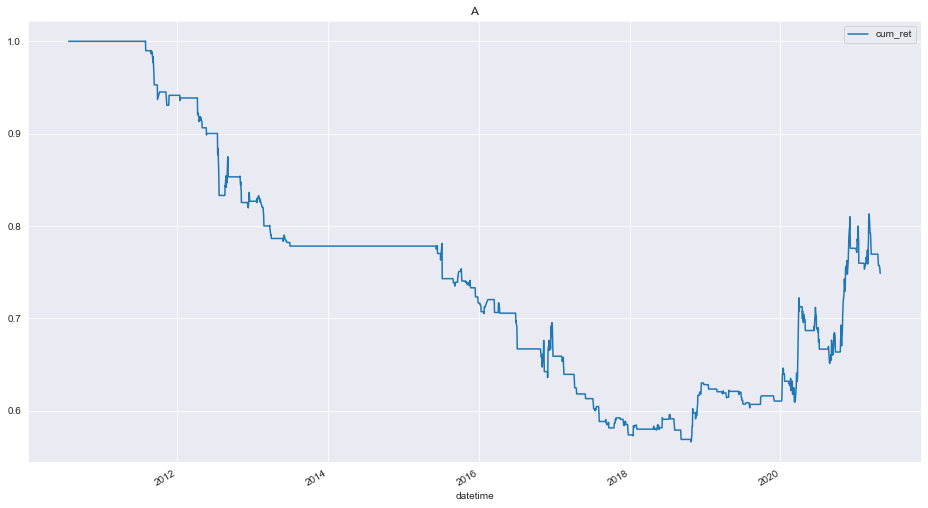

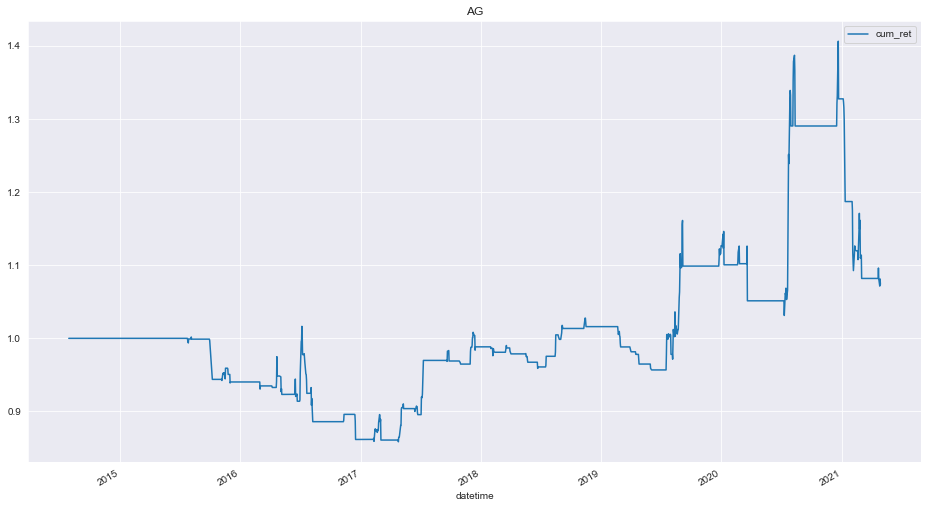

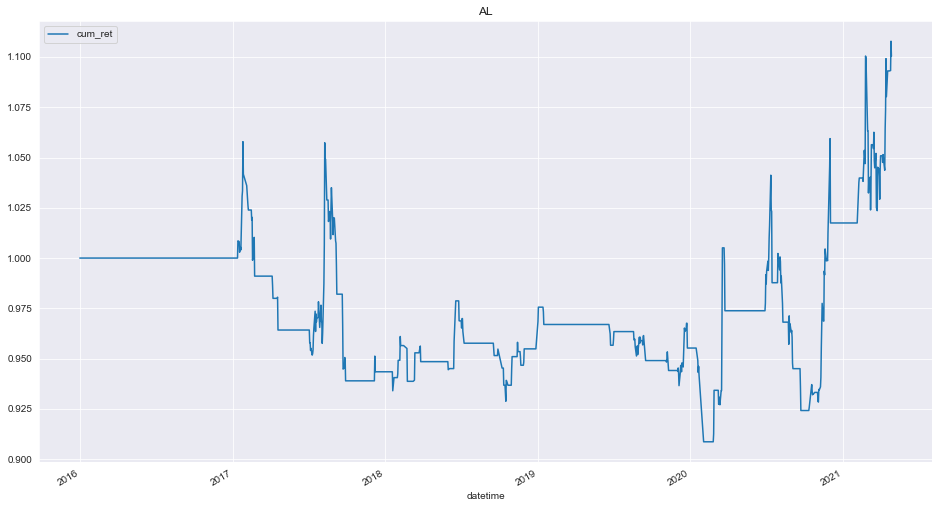

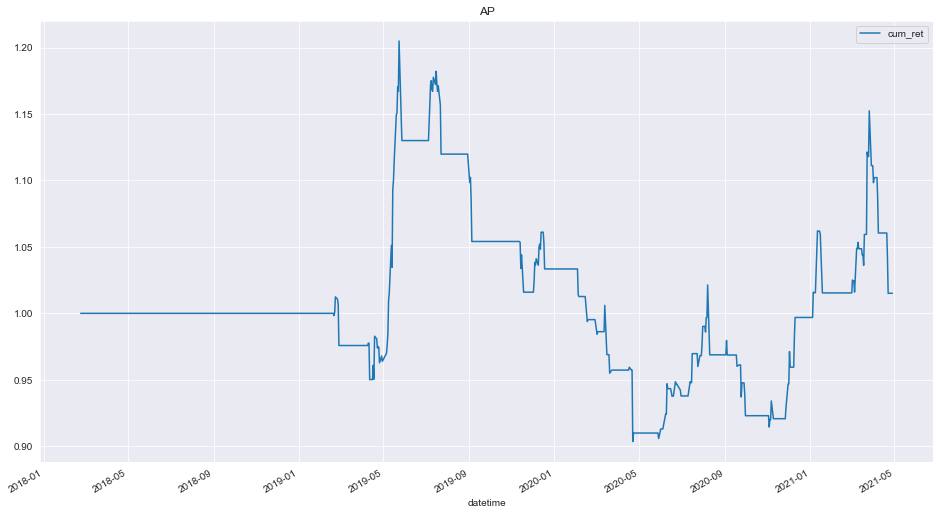

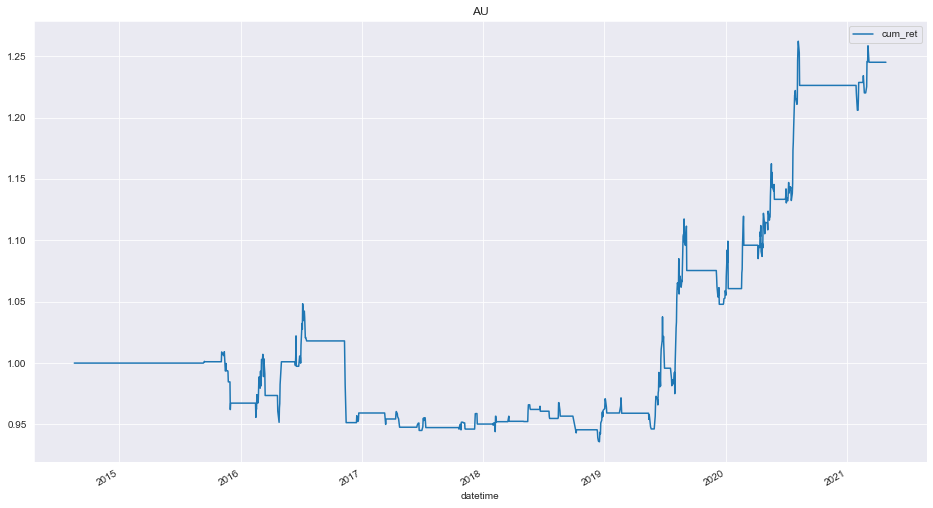

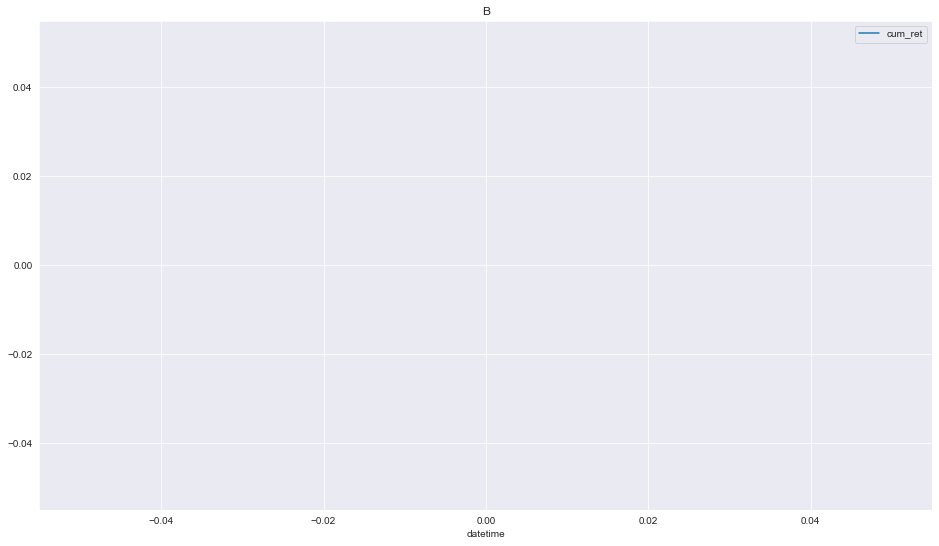

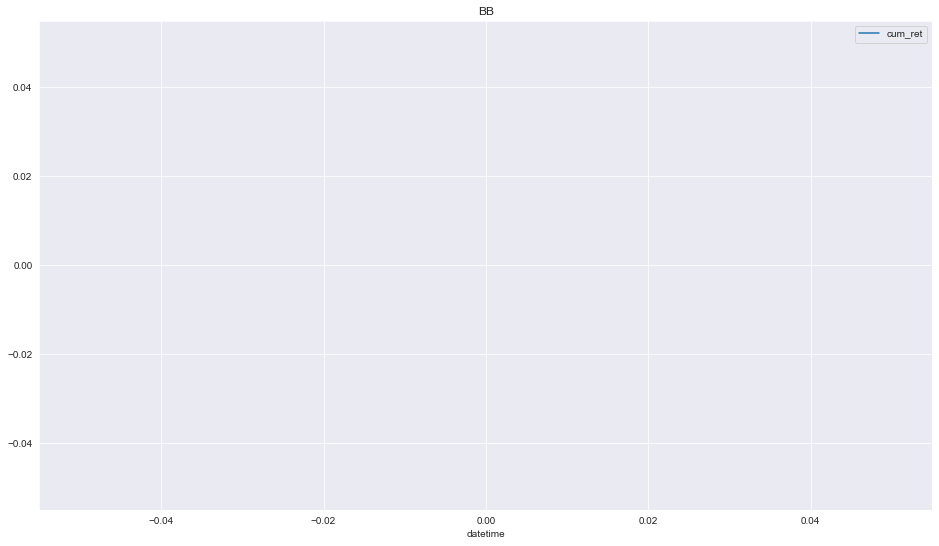

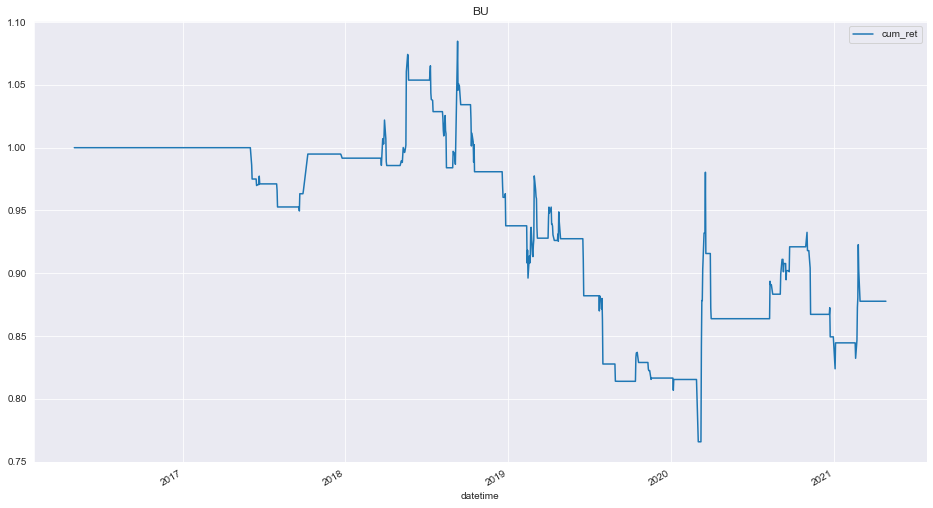

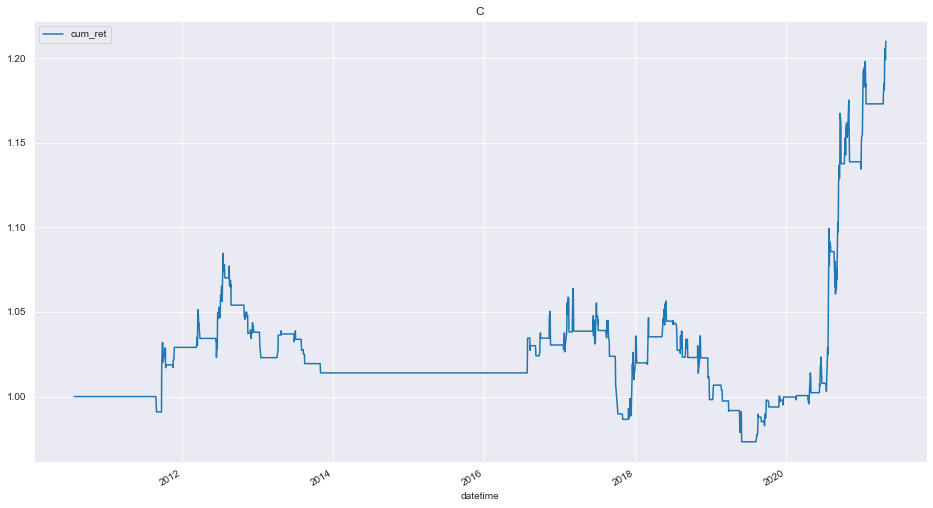

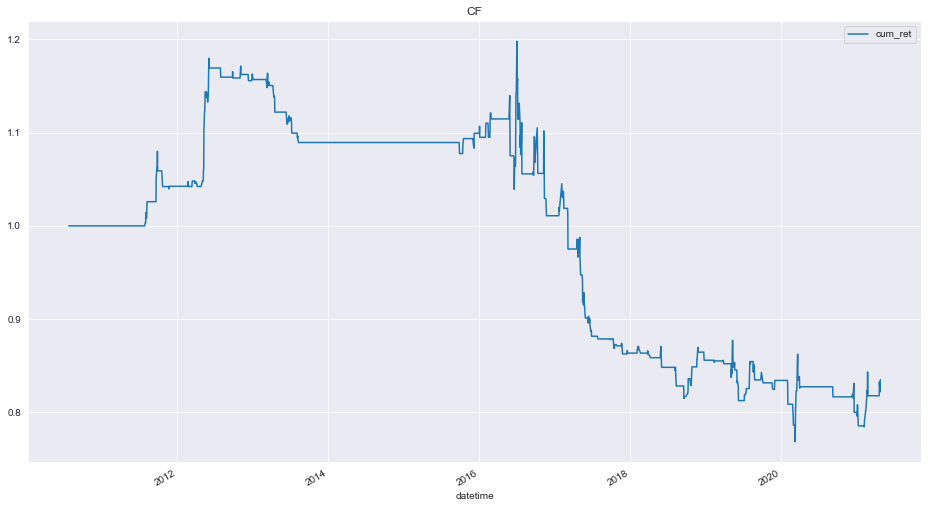

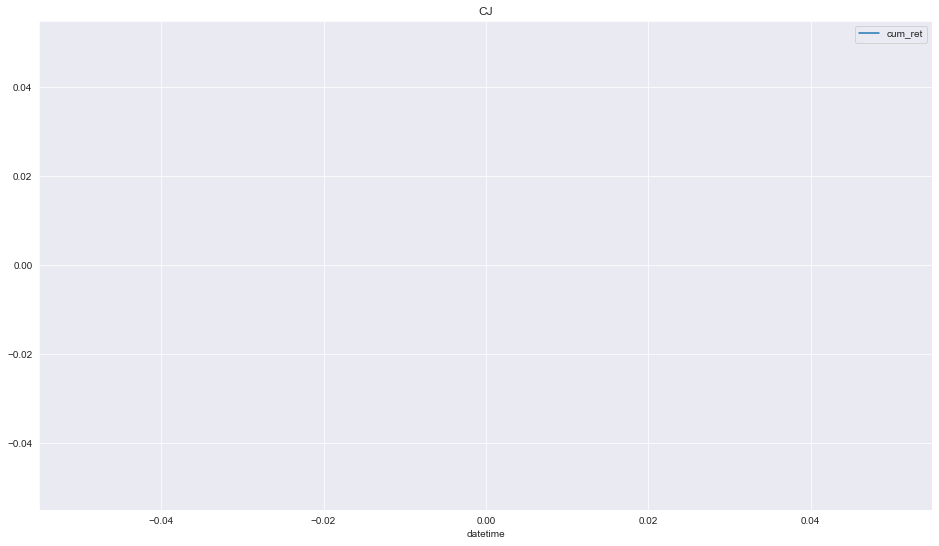

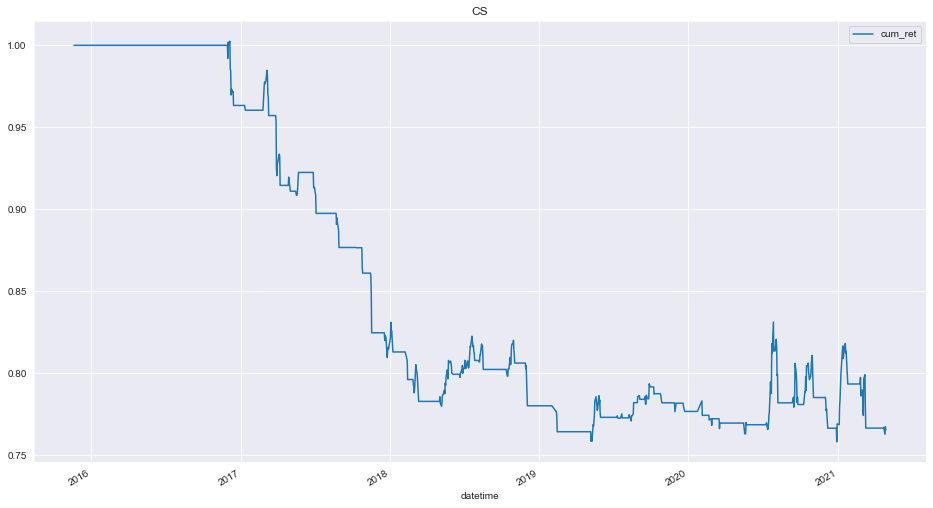

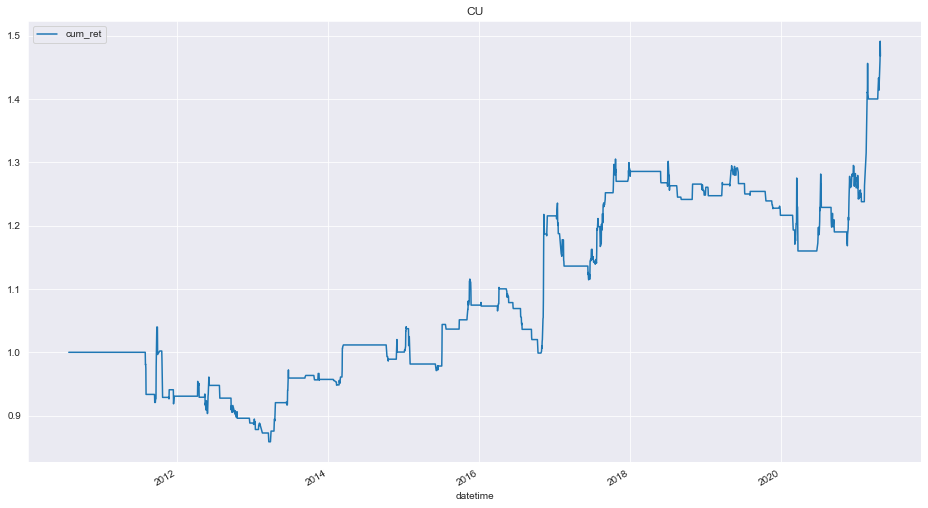

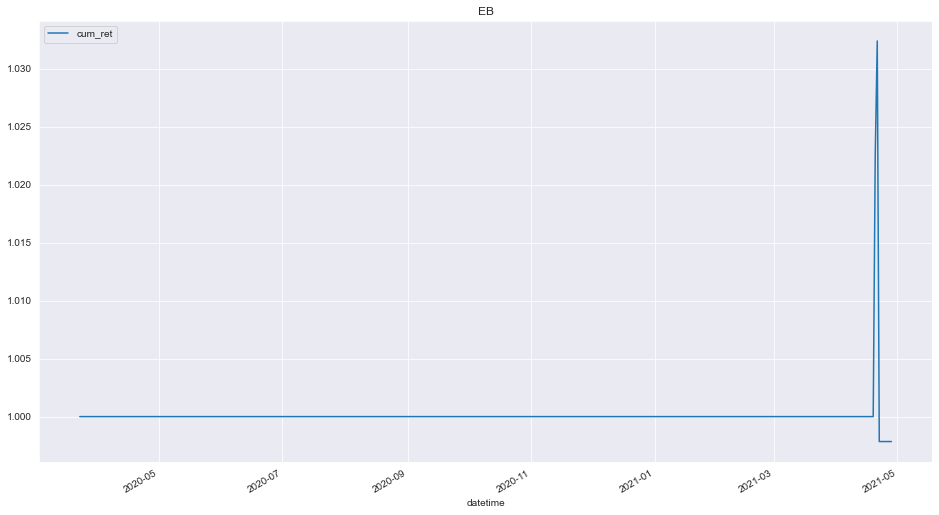

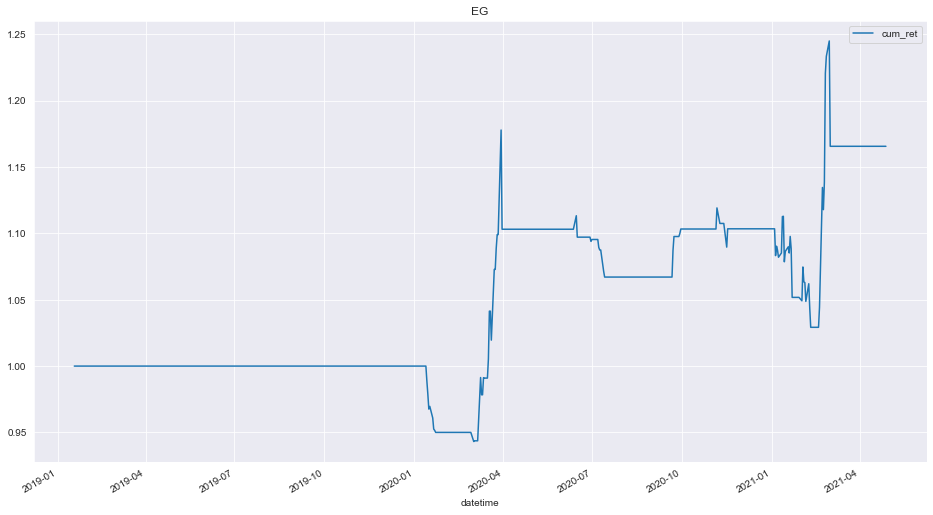

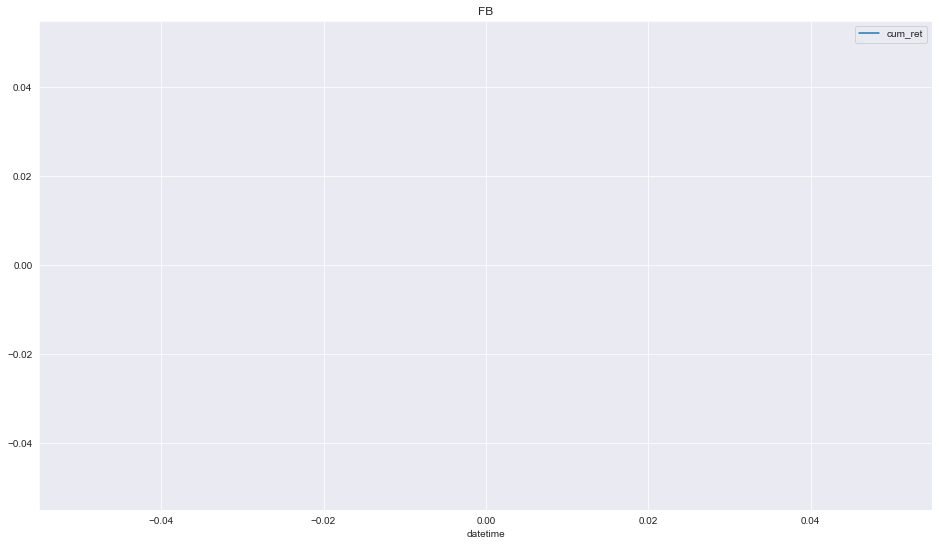

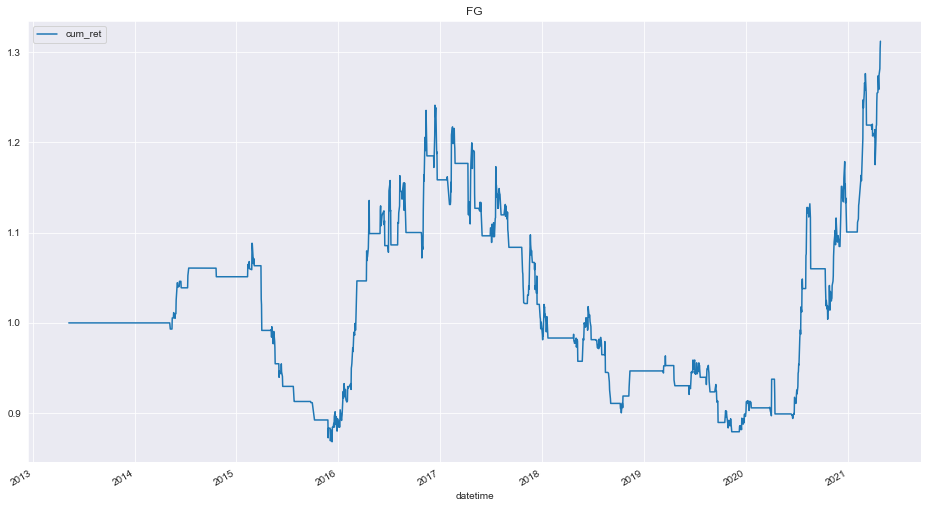

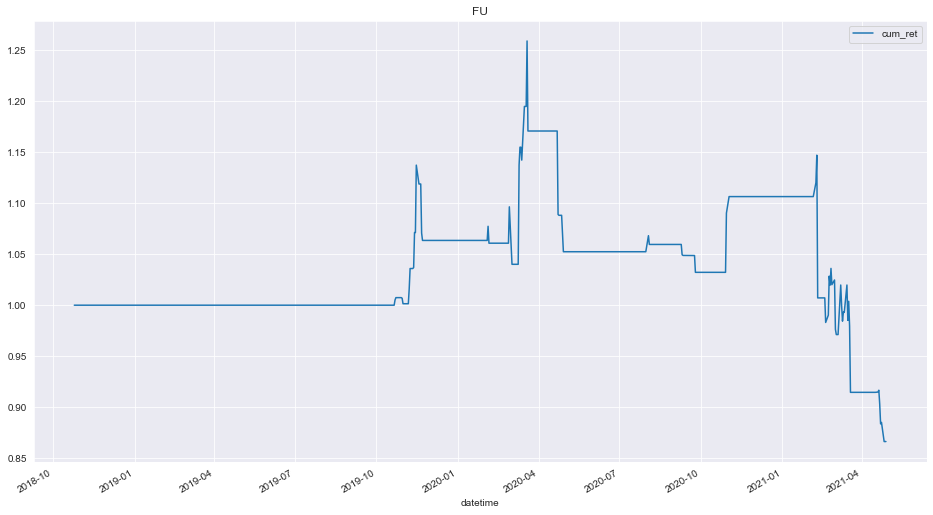

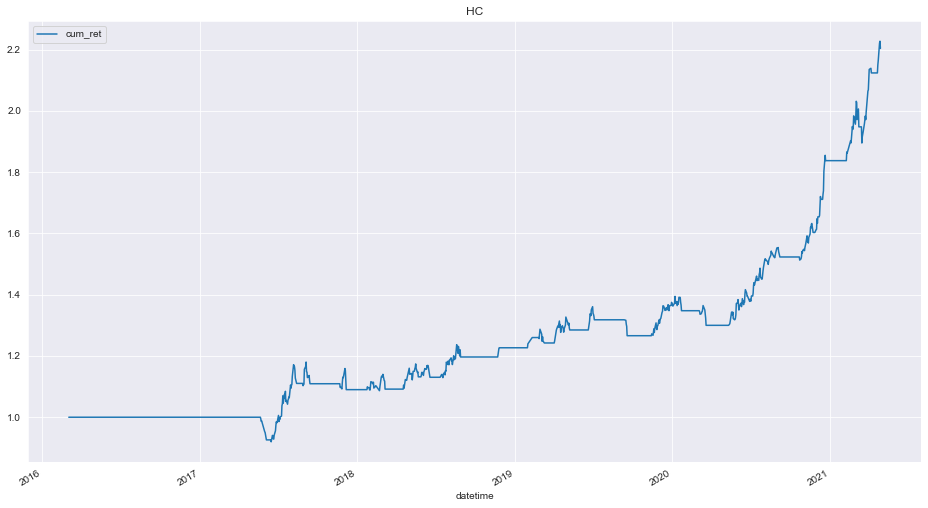

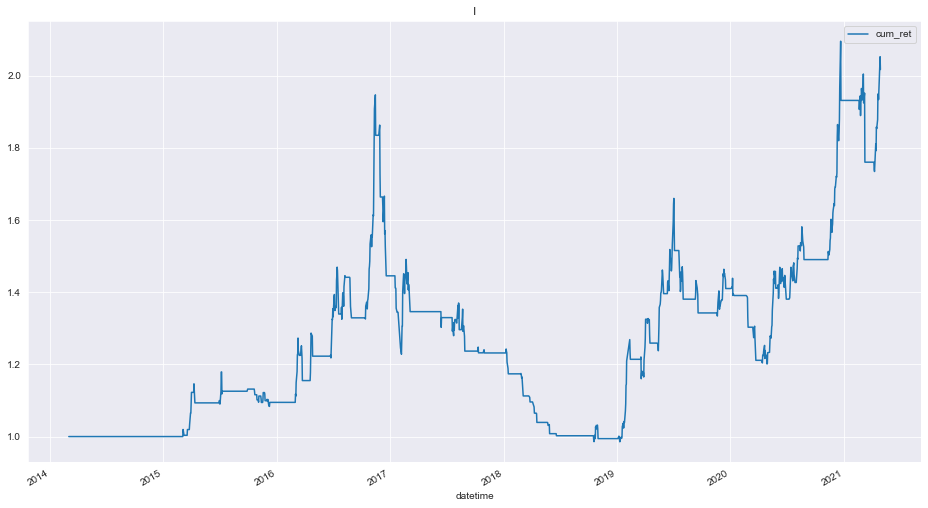

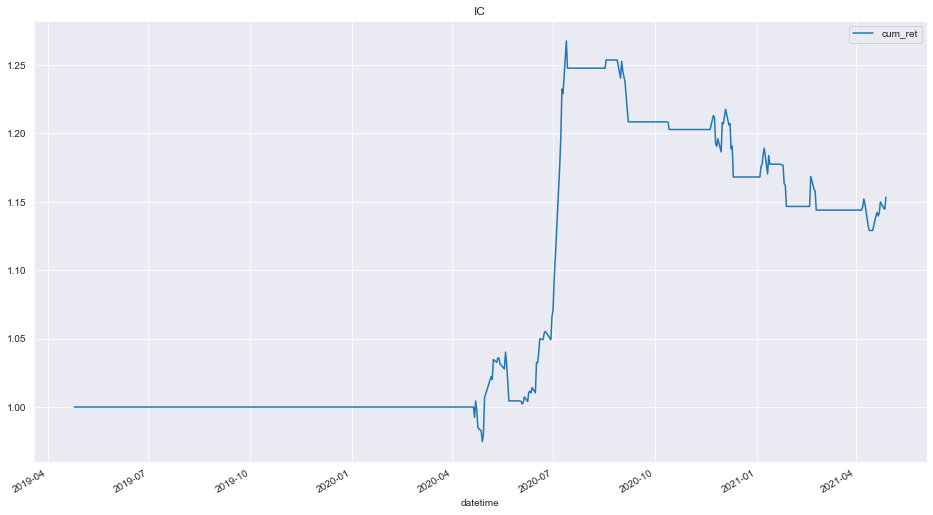

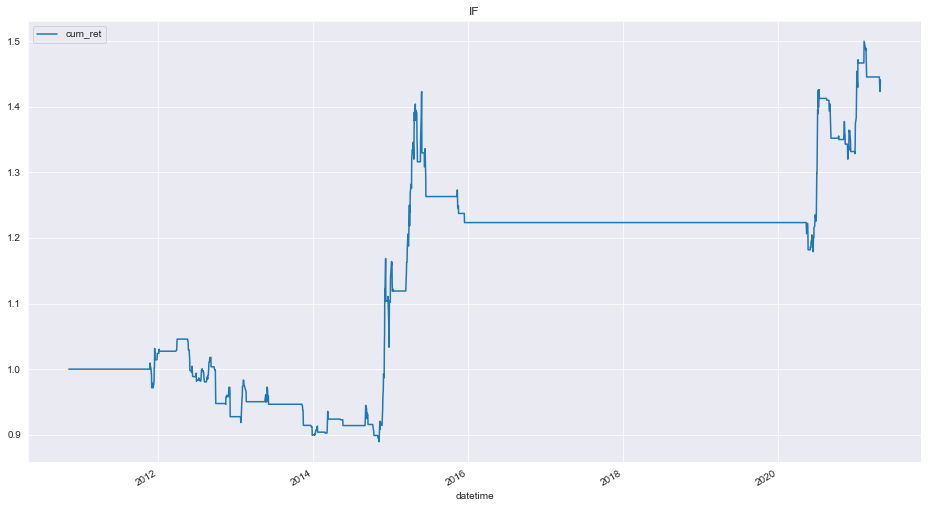

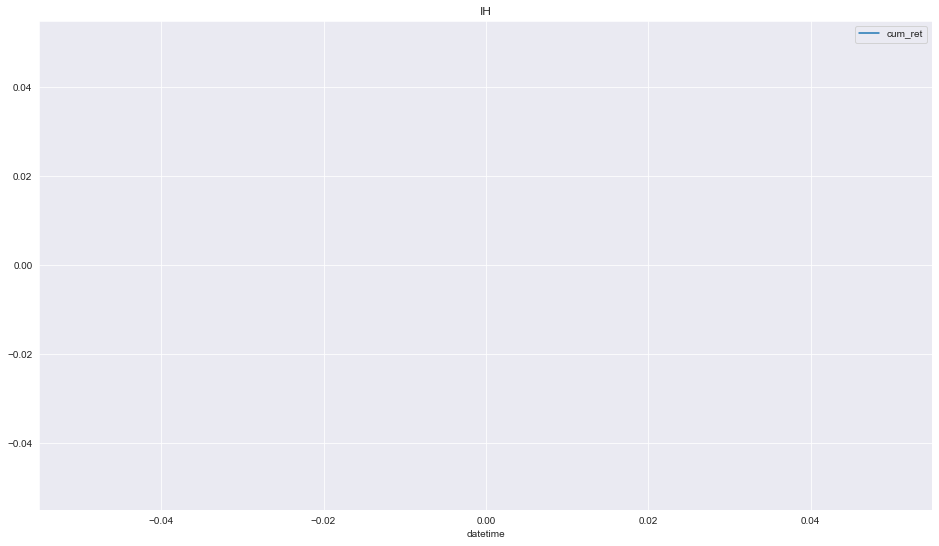

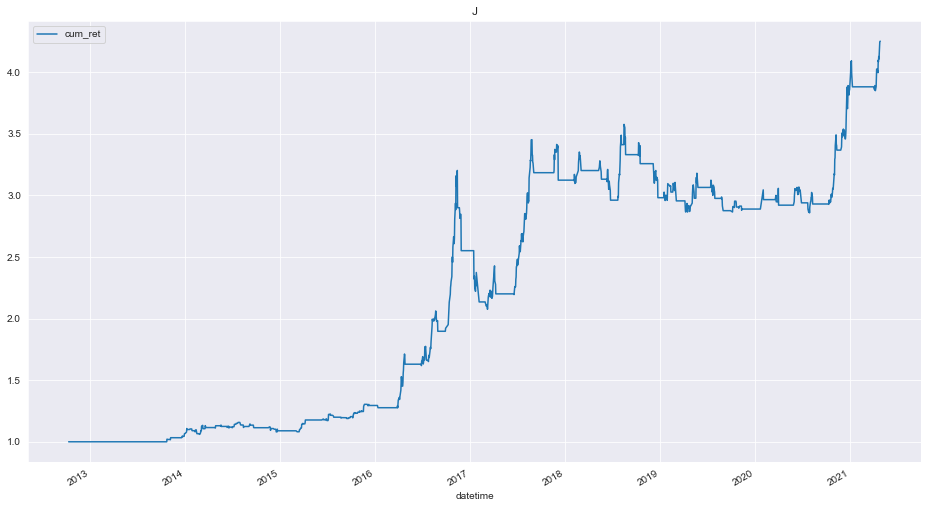

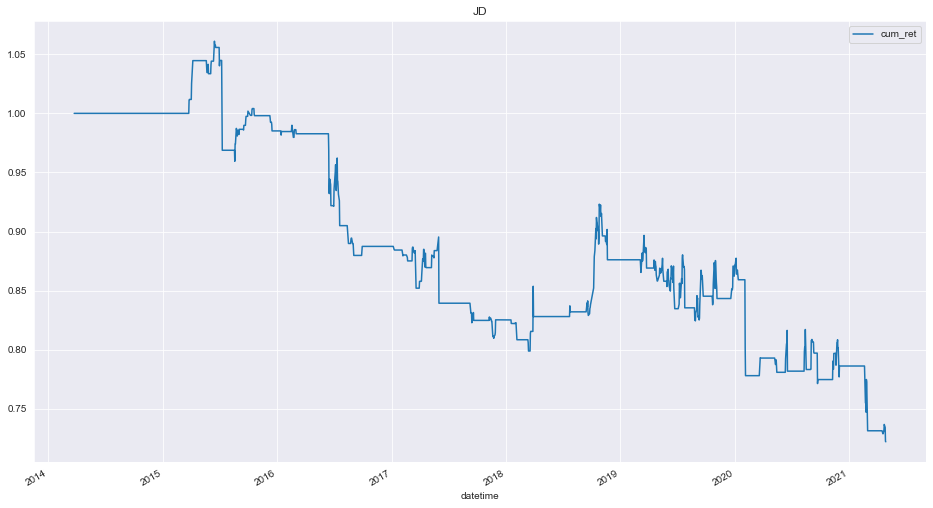

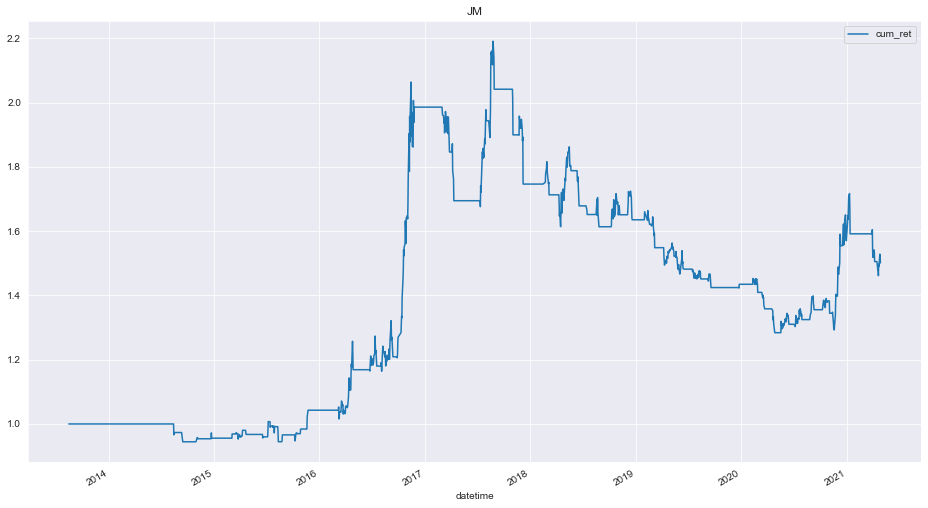

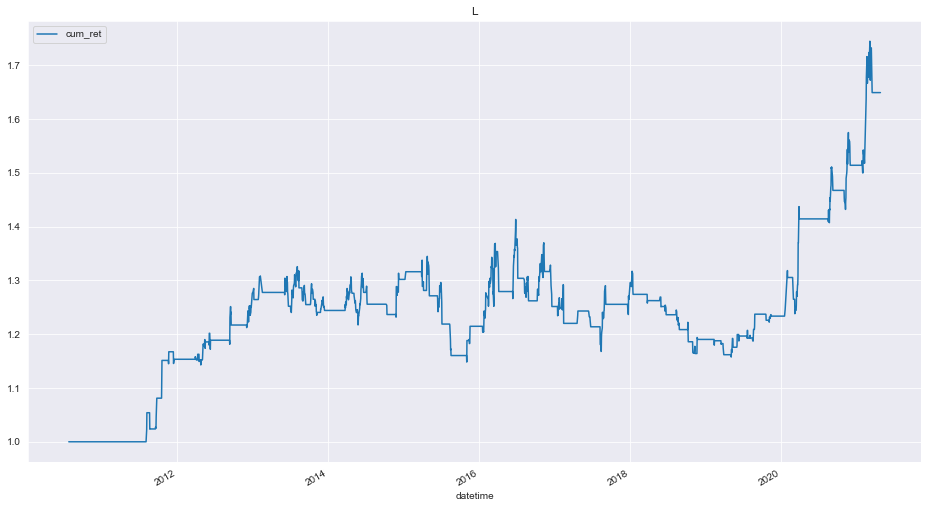

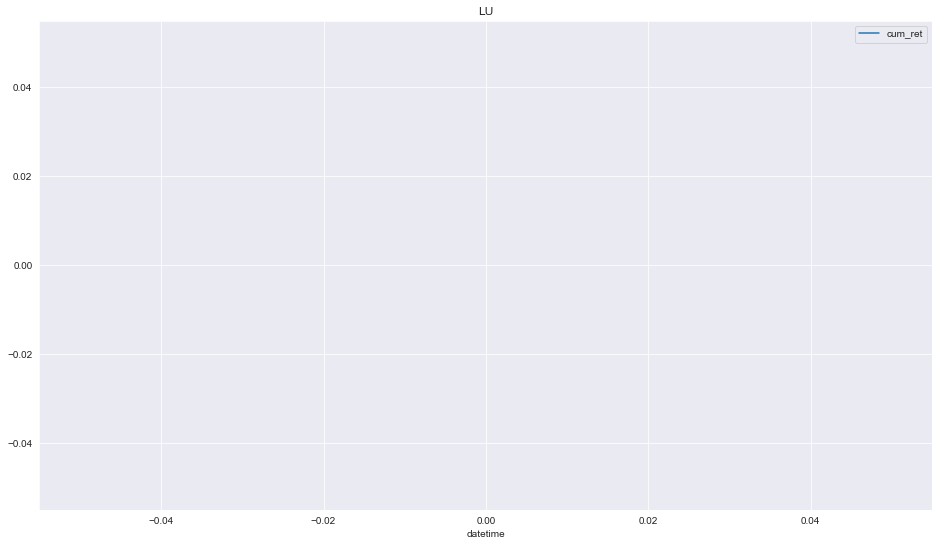

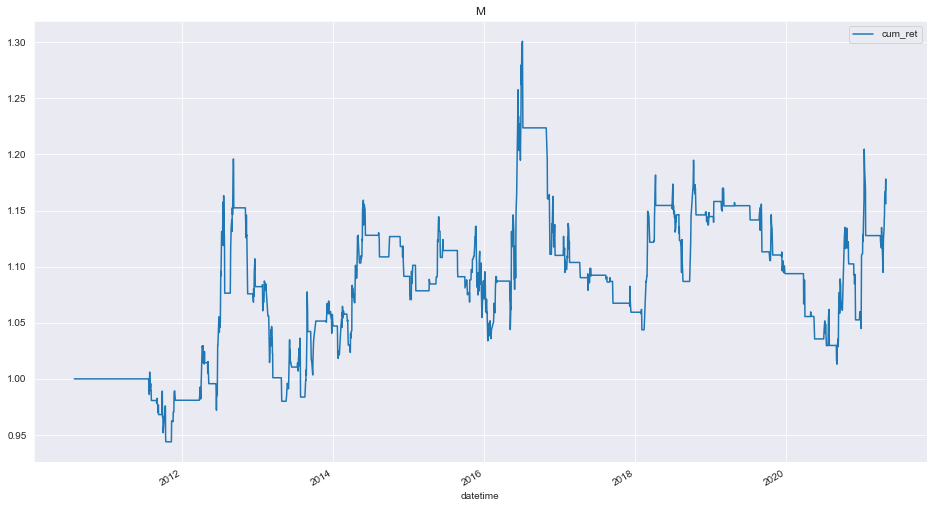

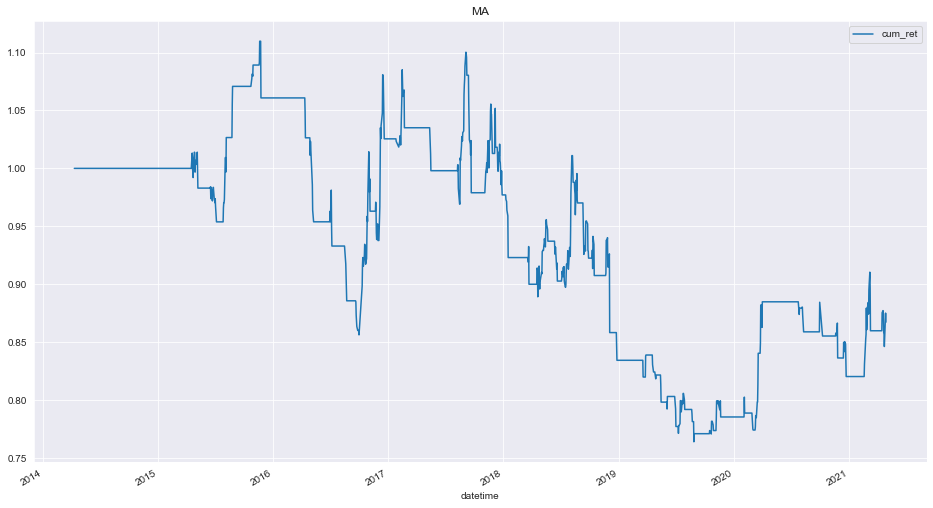

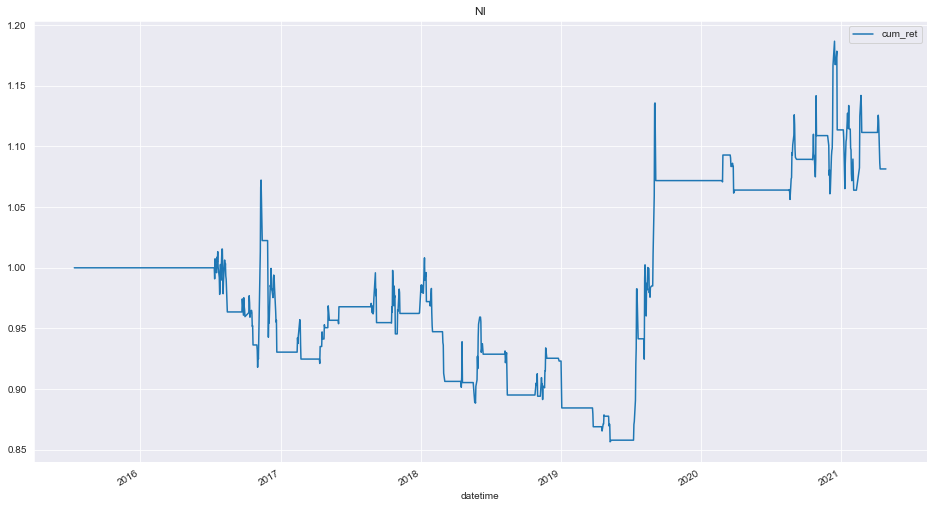

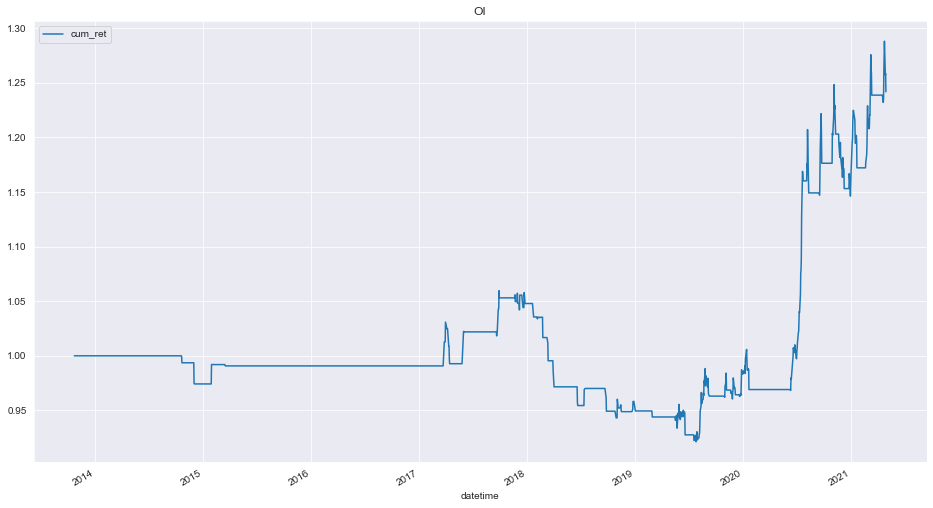

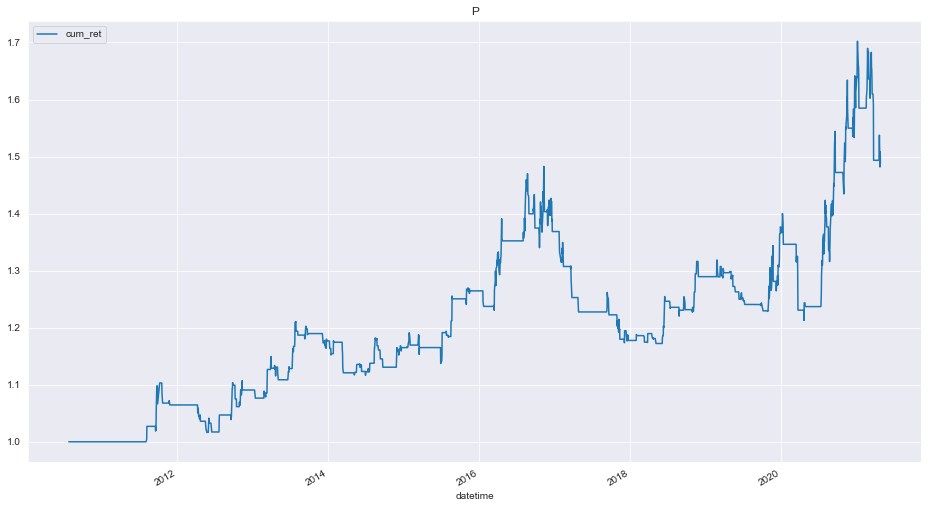

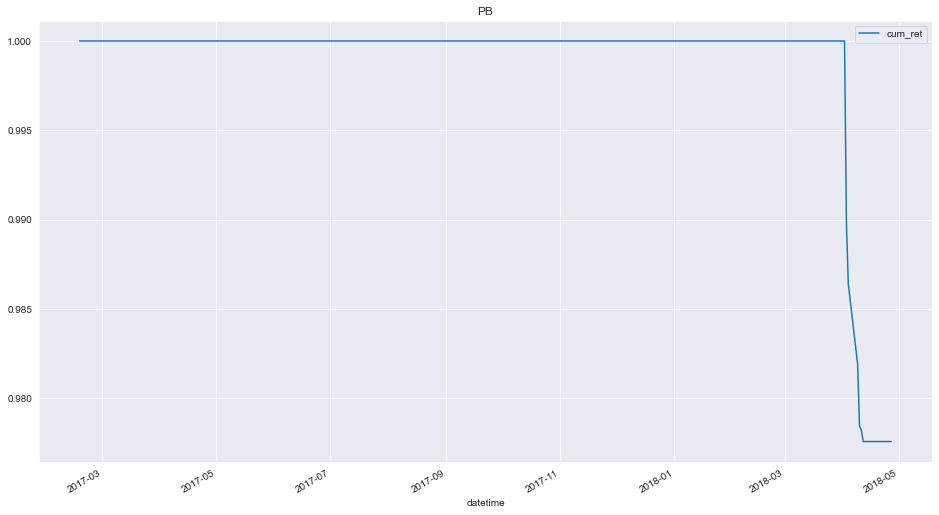

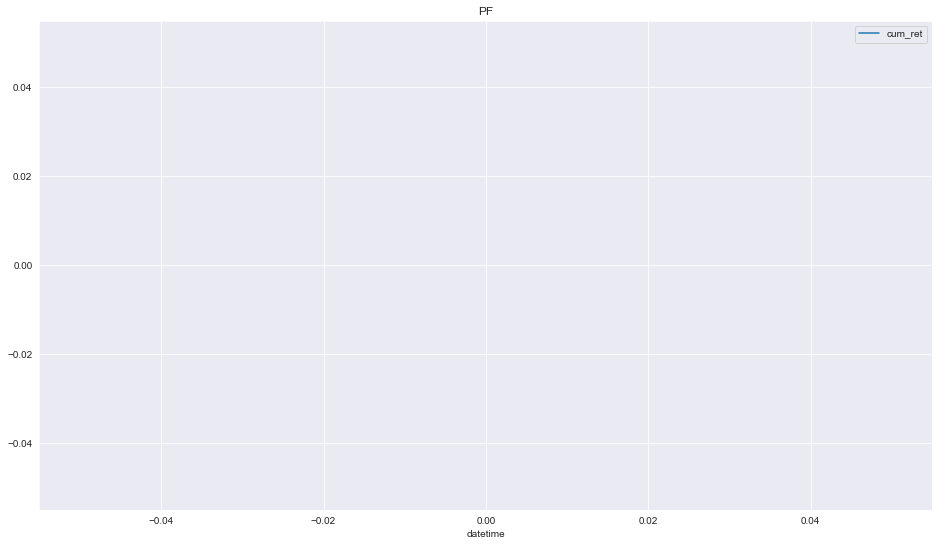

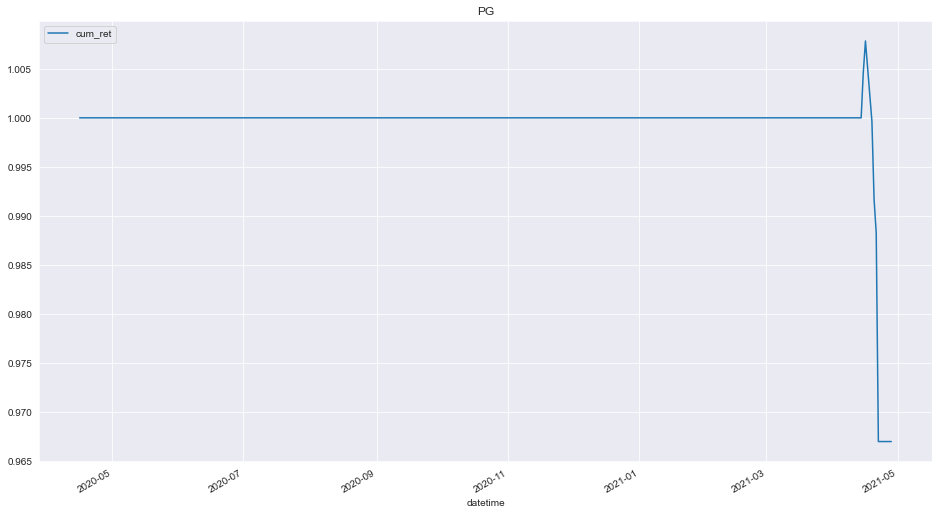

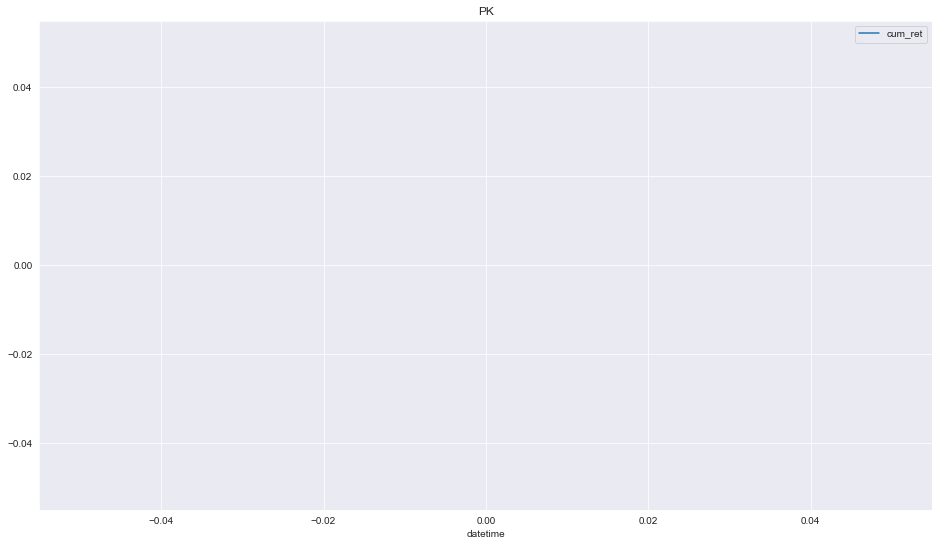

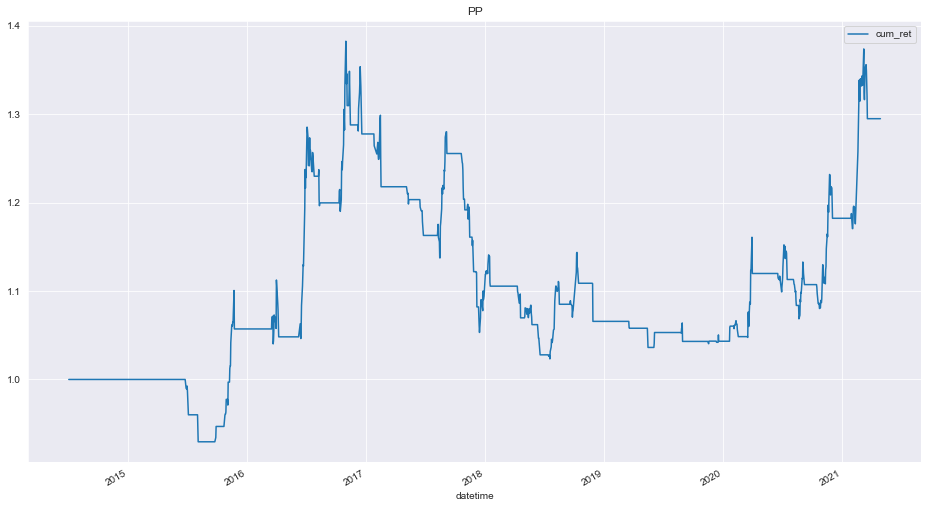

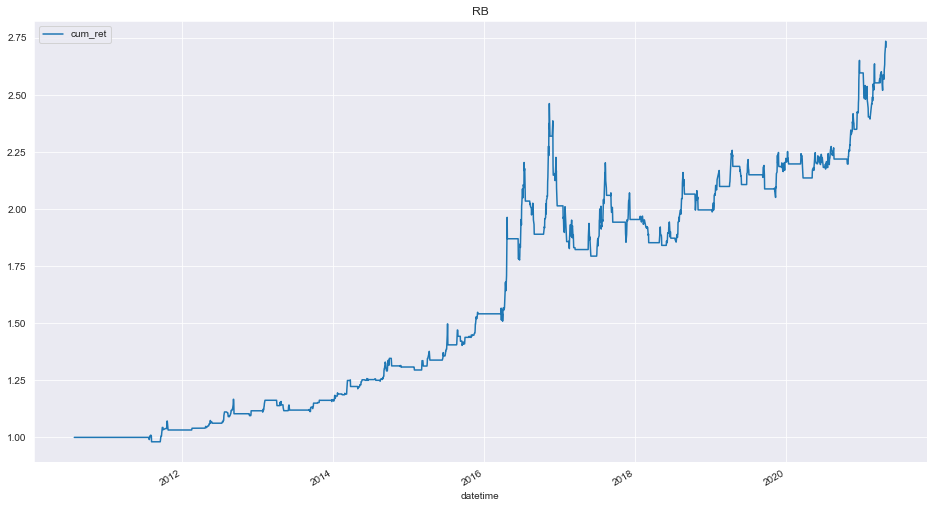

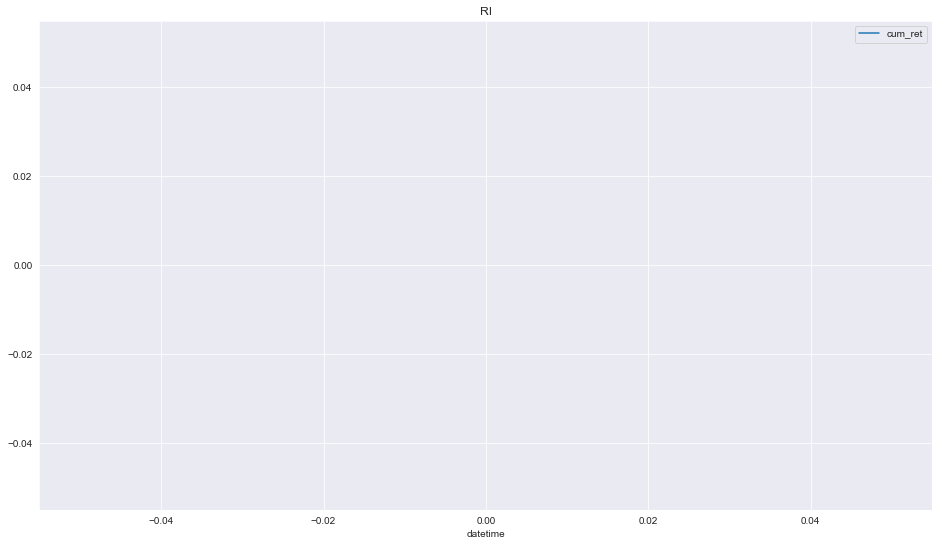

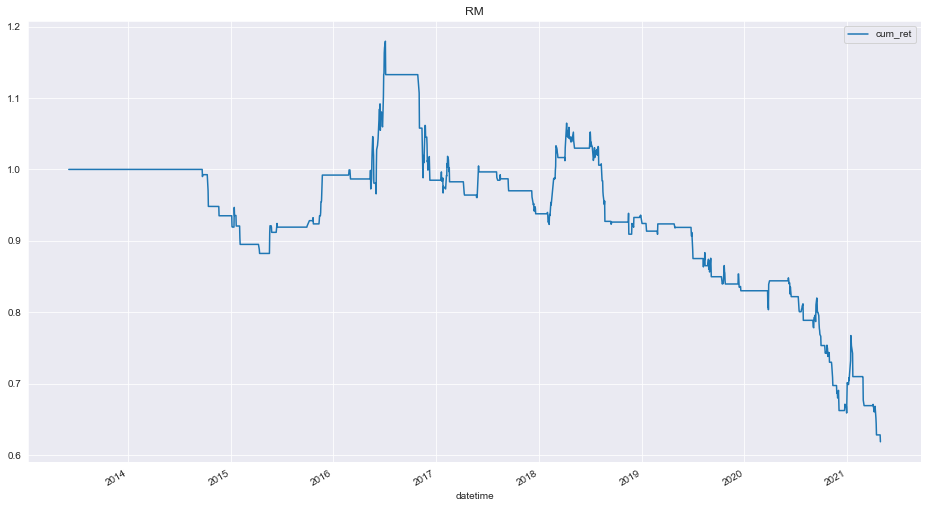

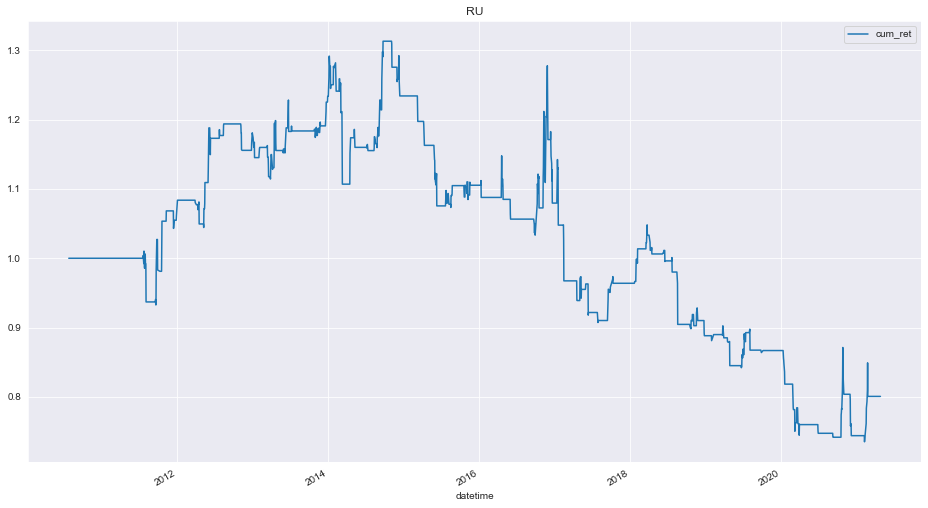

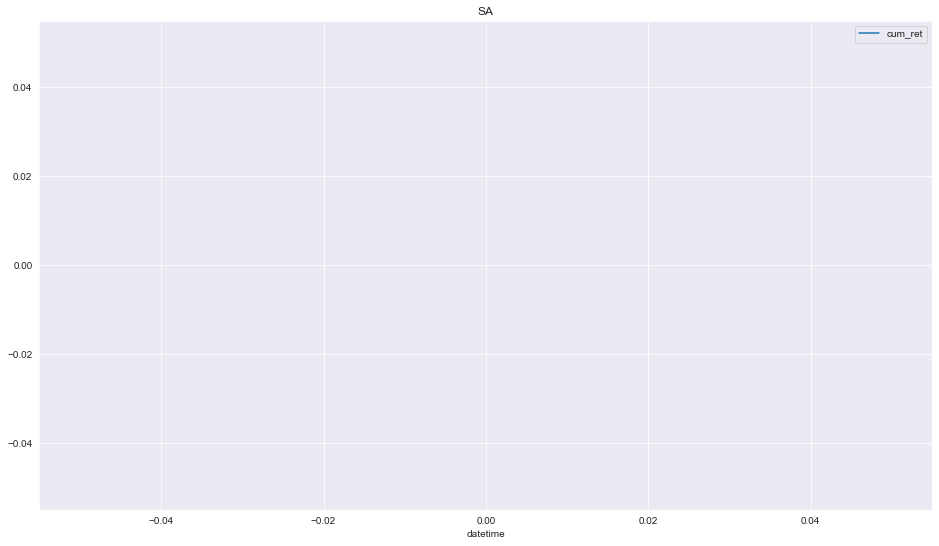

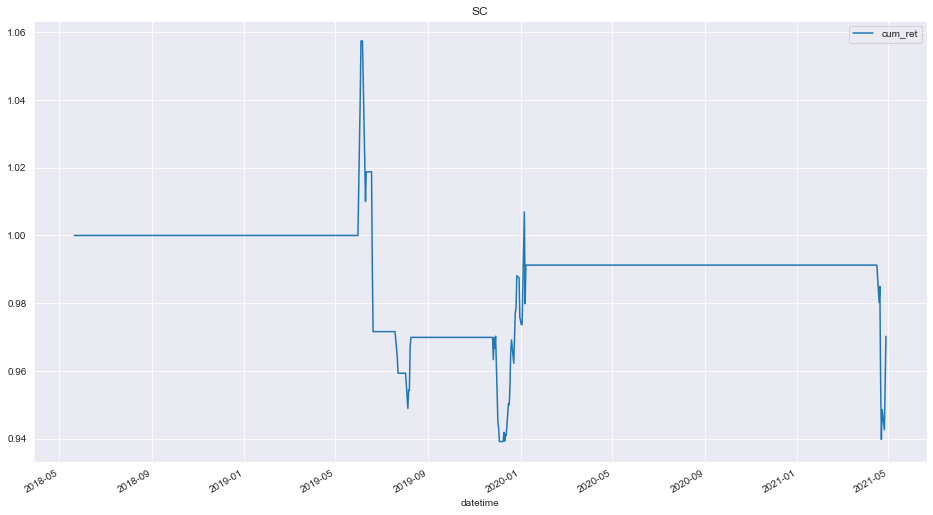

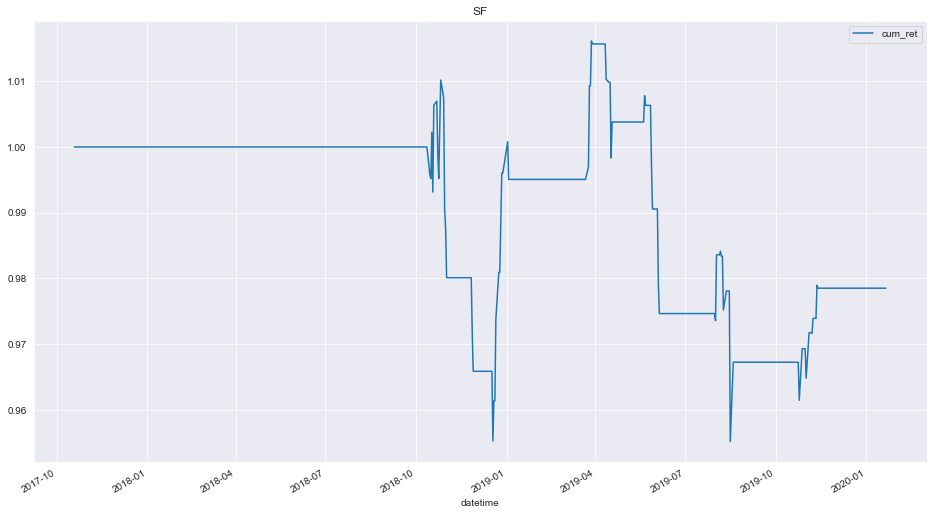

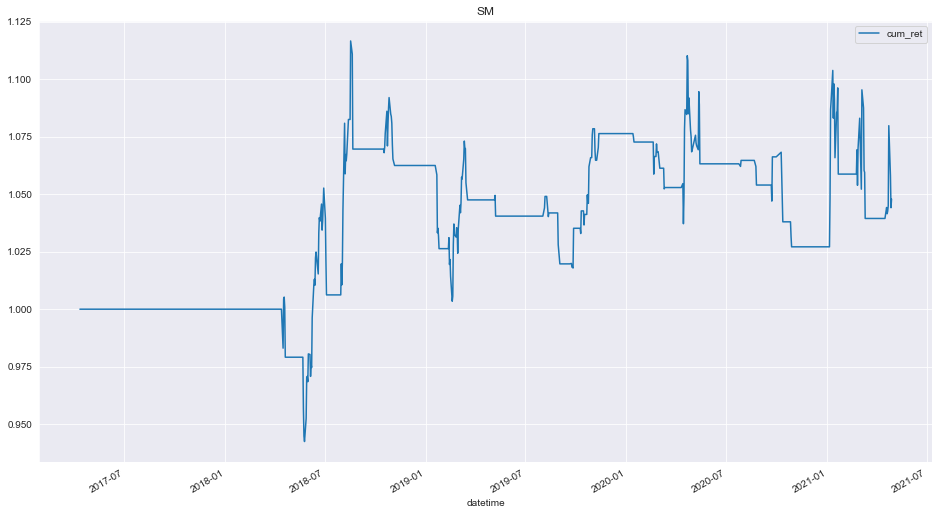

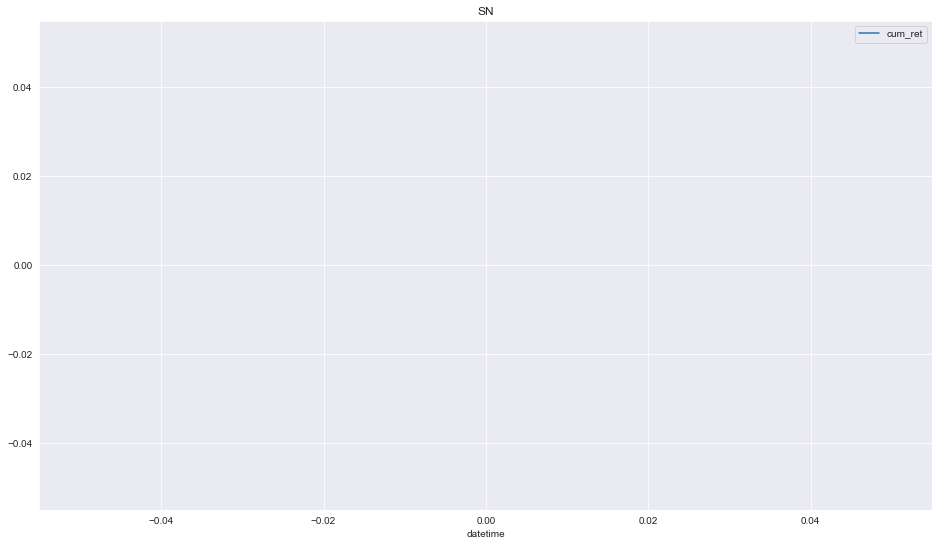

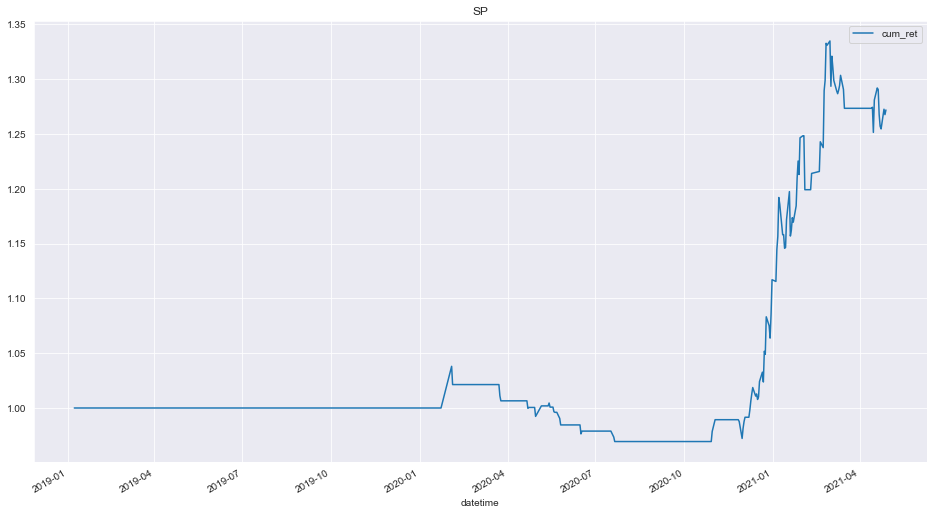

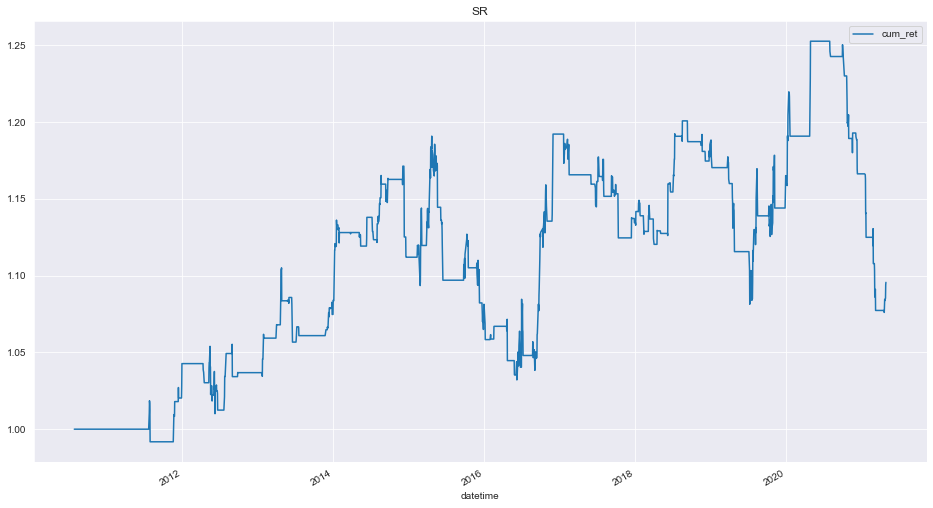

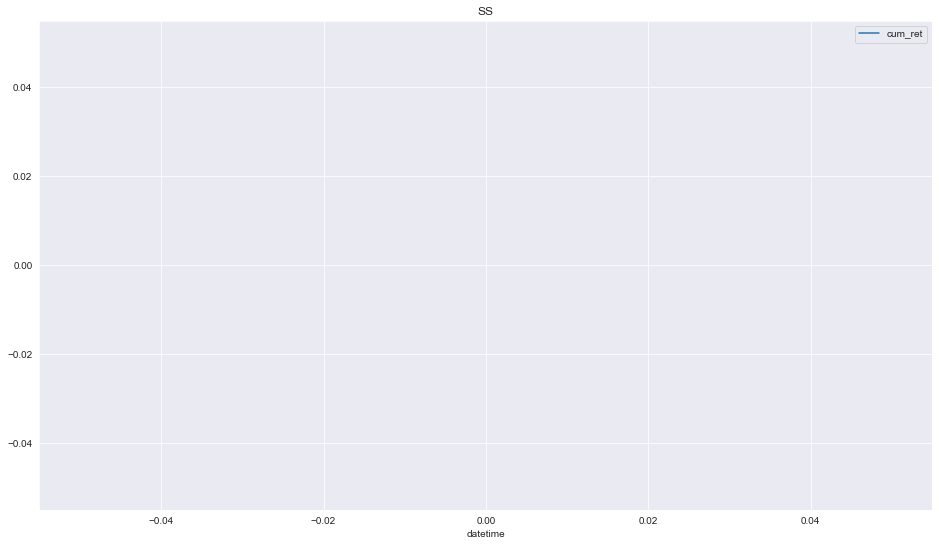

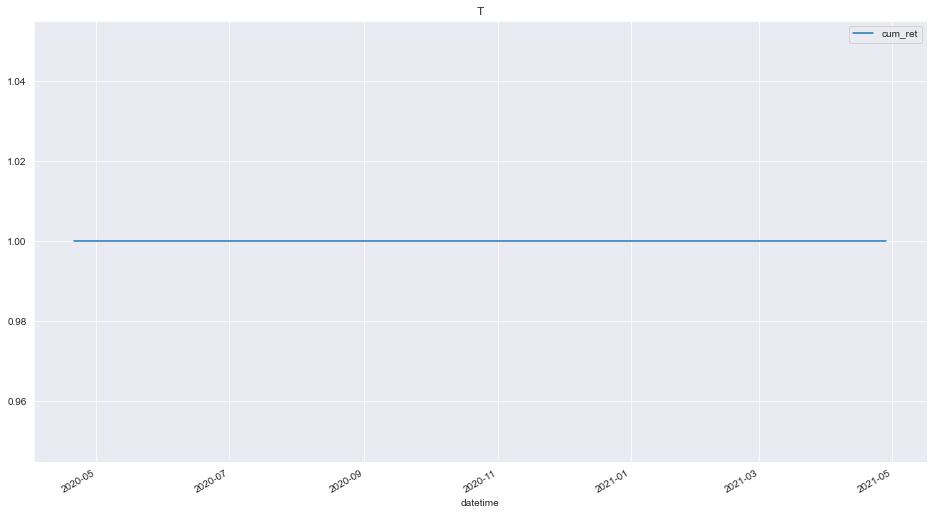

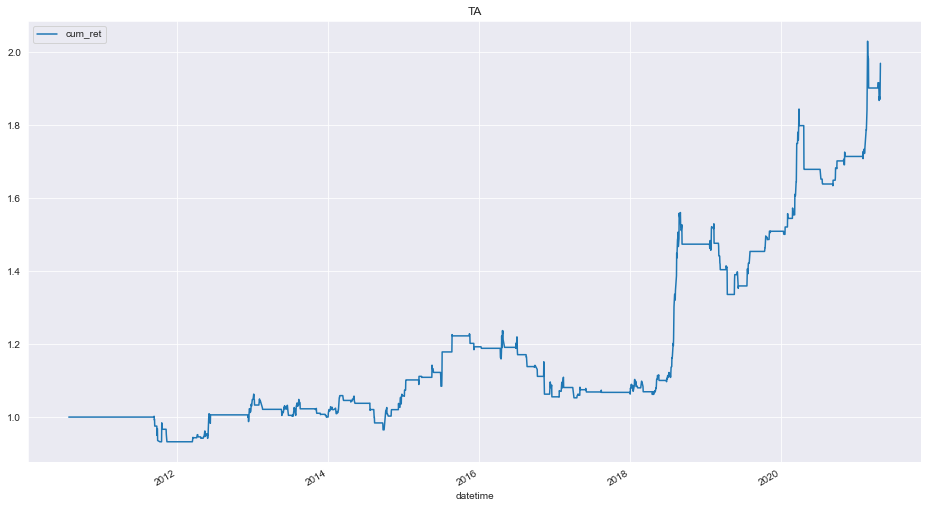

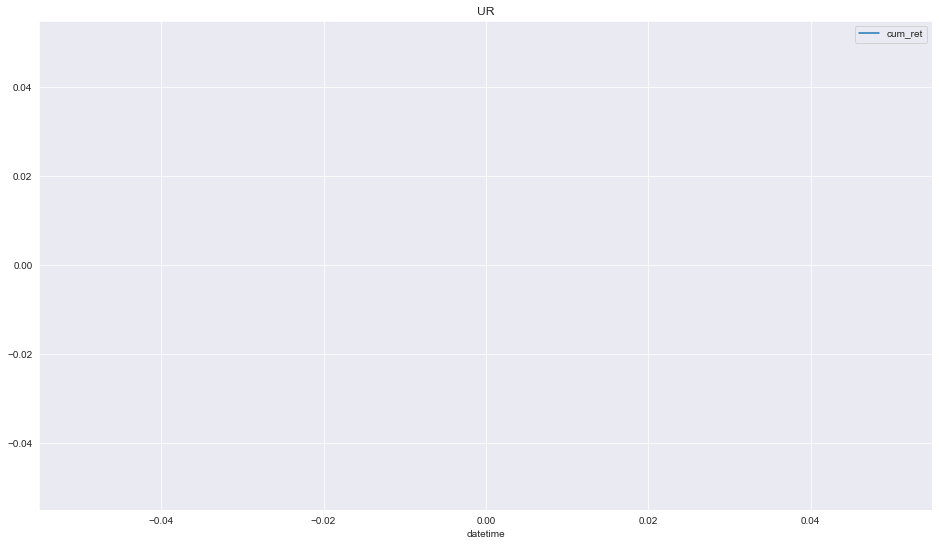

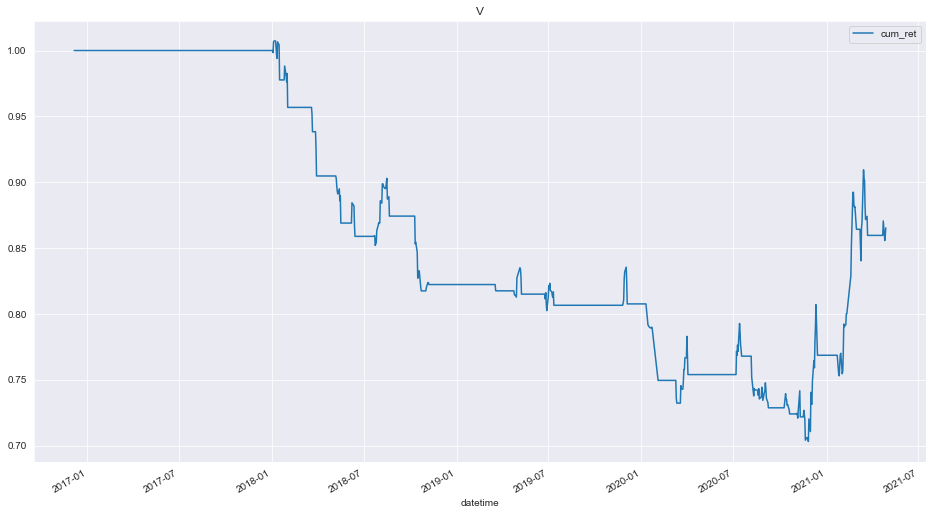

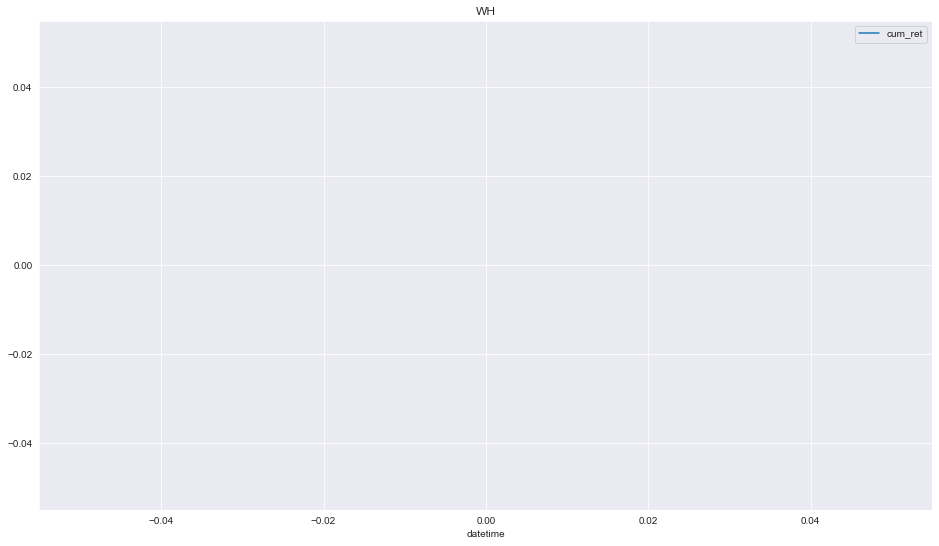

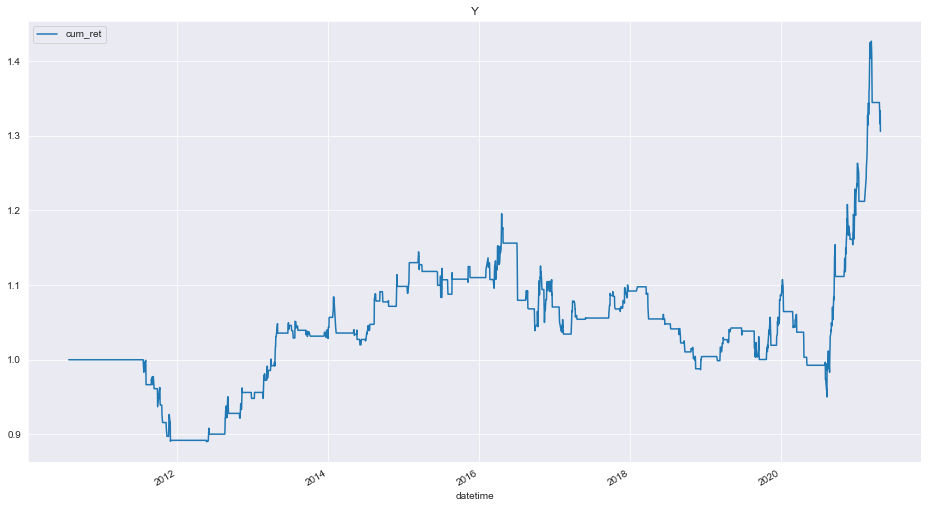

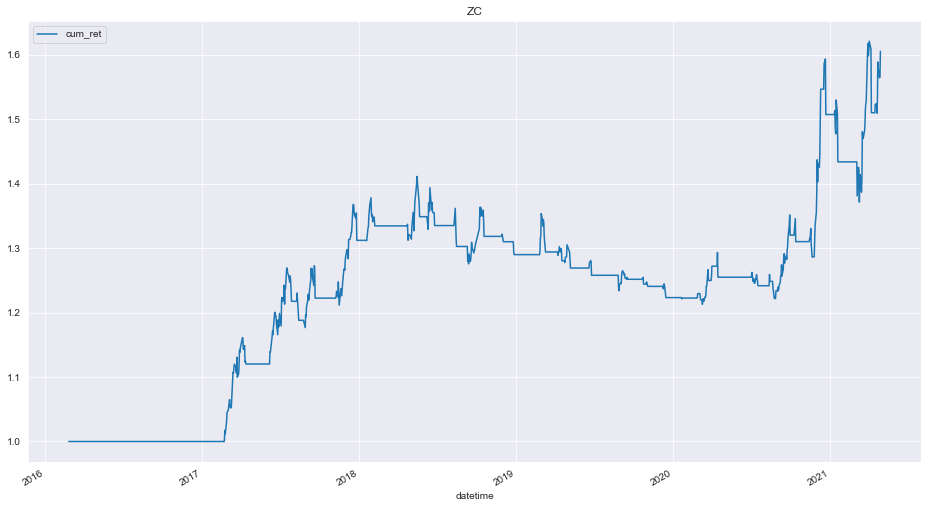

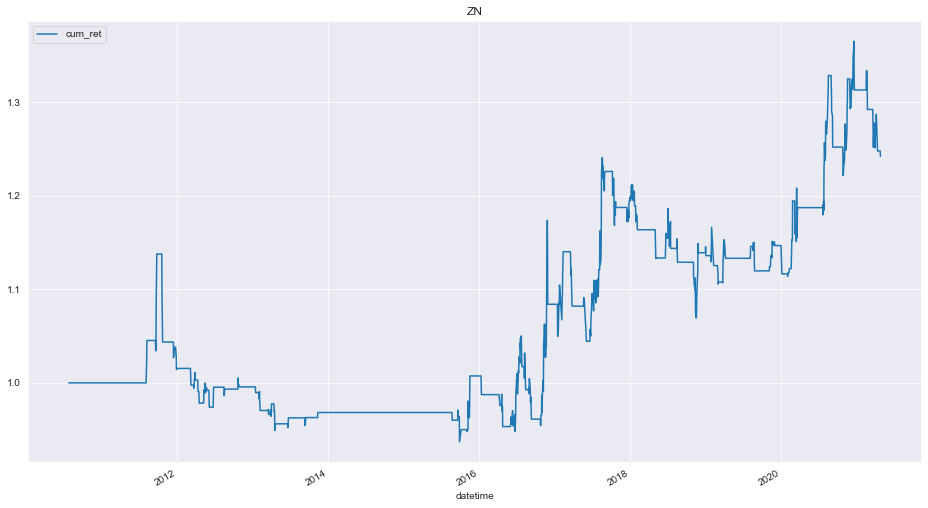

In [4]:
for c in C_DAILY:
    cursord = query(db_name=DB, col='daily', category=c, use_real_price=False)
    cum_retd = avg_cum_ret_from_cursor(cursord)
    cum_retd.plot(title=c, figsize=(16, 9))